In [1]:
# Imports and physical parameters
import numpy as np
import scipy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import *
from matplotlib.widgets import Slider

# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ddgclib._complex import Complex
from ddgclib import *
from ddgclib._complex import *
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._capillary_rise_flow import * #plot_surface#, curvature
from ddgclib._hyperboloid import *
from ddgclib._catenoid import *
from ddgclib._catenoid_error import *
from ddgclib._cylinder import *
from ddgclib._ellipsoid import *
from ddgclib._eos import *
from ddgclib._misc import *
from ddgclib._plotting import *
#from ddgclib._case2 import *

def curvature(v):
    F, nn = vectorise_vnn(v)
    curvature_dict = b_curvatures_hn_ij_c_ij(F, nn)
    HNdA_i = curvature_dict['HNdA_i']
    return HNdA_i

# Parameters for
# a water droplet in air at standard laboratory conditions
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

# Numerical parameters #Stated this is what to plaay
r = 1
theta_p = 20 * np.pi/180.0  # rad, three phase contact angle

refinement=3# NOTE: 2 is the minimum refinement needed for the complex to be manifold

In [2]:
'''
In this part of the code a cylinder mesh will be generated
'''
v_l, v_u = -1.5, 1.5

a, b, c = 1, 0, 1  # Geometric parameters of the catenoid; can also be modified
abc = (a, b, c)
u_l, u_u = 0 ,2 * np.pi

HC, bV, K_f, H_f, neck_verts, neck_sols = catenoiderror_N(r, theta_p, gamma, abc,u_l, u_u, v_l, v_u, refinement=refinement, cdist=1e-5, equilibrium=True)

# Define bottom boundary condition
boundary_bottom = []
for v in HC.V:
    if v.x[2] == v_l:
        boundary_bottom.append(v)

# Define top boundary condition
boundary_top = []
for v in HC.V:
    if v.x[2] == v_u:
        boundary_top.append(v)


plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

In [3]:
'''
in this part of the code, the boundarys will be closed with the function close_boundary.

'''
def close_boundary(HC, boundary_top, boundary_bottom):
    v_avg_top = np.zeros(3)
    for v in boundary_top:
        v_avg_top += v.x_a

    v_avg_top = v_avg_top/len(boundary_top)
    v_avg_bottom = np.zeros(3)
    for v in boundary_bottom:
        v_avg_bottom += v.x_a

    v_avg_bottom = v_avg_bottom/len(boundary_bottom)

    vat = HC.V[tuple(v_avg_top)]
    for v in boundary_top:
        v.connect(vat)

    vab = HC.V[tuple(v_avg_bottom)]
    for v in boundary_bottom:
        v.connect(vab)

#    boundary_top.add(vat) # from stefan
#    boundary_bottom.add(vab) # from stefan

    boundary_top.append(vat)
    boundary_bottom.append(vab)
    return HC, boundary_top, boundary_bottom

In [4]:
HC, boundary_top, boundary_bottom = close_boundary(HC, boundary_top, boundary_bottom)

In [5]:
plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

In [6]:
HC.vertex_face_mesh()

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

                 self.simplices_fm, A list of (dim + 1)-lists containing vertex
                                    objects in a simplex.

                 self.simplices_fm_i, Same as self.simplices_fm except contains
                                      the indices corresponding to the list in
                                      self.vertices_fm

In [7]:
HC.simplices_fm, HC.simplices_fm_i  # Same as facets

([[array([ 1. ,  0. , -1.5]),
   array([ 0.70710678,  0.70710678, -1.5       ]),
   array([ 0.92387953,  0.38268343, -1.3125    ])],
  [array([ 1. ,  0. , -1.5]),
   array([ 0.70710678,  0.70710678, -1.5       ]),
   array([-4.16333634e-17,  2.77555756e-17, -1.50000000e+00])],
  [array([ 1. ,  0. , -1.5]),
   array([ 0.70710678, -0.70710678, -1.5       ]),
   array([ 0.92387953, -0.38268343, -1.3125    ])],
  [array([ 1. ,  0. , -1.5]),
   array([ 0.70710678, -0.70710678, -1.5       ]),
   array([-4.16333634e-17,  2.77555756e-17, -1.50000000e+00])],
  [array([ 1. ,  0. , -1.5]),
   array([ 1.0000000e+00, -2.4492936e-16, -1.1250000e+00]),
   array([ 0.92387953, -0.38268343, -1.3125    ])],
  [array([ 1. ,  0. , -1.5]),
   array([ 1.0000000e+00, -2.4492936e-16, -1.1250000e+00]),
   array([ 0.92387953,  0.38268343, -1.3125    ])],
  [array([ 1.0000000e+00, -2.4492936e-16,  1.5000000e+00]),
   array([1.   , 0.   , 1.125]),
   array([0.92387953, 0.38268343, 1.3125    ])],
  [array([ 1.00000

In [8]:
plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

In [9]:
len(boundary_top)

9

In [10]:
plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

In [63]:
'''
Calculation of an liquid-bridge with the variables v_l, v_u (geometry)
and tau, t_f (for the optimization)
'''

v_l, v_u = -0.5, 0.5 # lower and upper z-coordinate

t = 0  #  initial time (=constant)

tau = 0.1 # =dt
t_f = 10 # breaking condition in the while-loop



'''
-----------------------------------------------------------
From here, the mesh for an open cylinder is meshed
'''

a, b, c = 1, 0, 1  # Geometric parameters of the catenoid; can also be modified
abc = (a, b, c)
u_l, u_u = 0 ,2 * np.pi

HC, bV, K_f, H_f, neck_verts, neck_sols = catenoiderror_N(r, theta_p, gamma, abc,u_l, u_u, v_l, v_u, refinement=refinement, cdist=1e-5, equilibrium=True)

# Define bottom boundary condition
boundary_bottom = []
for v in HC.V:
    if v.x[2] == v_l:
        boundary_bottom.append(v)

# Define top boundary condition
boundary_top = []
for v in HC.V:
    if v.x[2] == v_u:
        boundary_top.append(v)

'''
-----------------------------------------------------------
From here, the optimization is started
'''

'''
----------------------------------------------------
Dummy parameter for the residual
'''
# runvariable for the iteration tracking
residual_iteration = 0
iteration_list = []

# list to track the progress from df
df_list_max = []
df_list_min = []

# list to track the progress of HNdA
dHNdA_list_min = []
dHNdA_list_max = []

'''
----------------------------------------------------
'''

df_list = [] # unnecessary ???
while t < t_f:
    # Loop through all interior vertices
    cHCV = copy.copy(HC.V)

    # dummy list to find the maximum df
    df_list_dummy       = []
    dHNdA_list_dummy    = []
    for v in cHCV:
        # exclude boundaries
        if v in set(boundary_bottom):
            continue
        # Define top boundary condition
        if v in set(boundary_top):
            continue
        # Compute curvature for each interior vertex
        HNdA_i = curvature(v)
        #print(HNdA_i)
        # Step in time
        df = -gamma * HNdA_i
        v_new = v.x_a - tau/2 * df
        HC.V.move(v, tuple(v_new))
        df_list.append(tau * df) # unnecessary ???

        '''
        Try to implement a Residual with the mean curvature
        '''
        #print(HNdA_i)
        #print(np.linalg.norm(df))
        df_list_dummy.append(np.linalg.norm(df))
        dHNdA_list_dummy.append(np.linalg.norm(HNdA_i))
        #print(df)
    #print(HNdA_i)
    #print(max(df_list_dummy))

    # save the maximum and minimum datas for the Residuals
    df_list_max.append(max(df_list_dummy))
    df_list_min.append(min(df_list_dummy))

    # save the numbers of iteration for lately plotting
    residual_iteration = residual_iteration +1
    iteration_list.append(residual_iteration)

    dHNdA_list_max.append(max(dHNdA_list_dummy))
    dHNdA_list_min.append(min(dHNdA_list_dummy))

    t = tau + t
    #print(df_list_dummy)
#plot_polyscope(HC)


Text(0.5, 1.0, 'Residuals for HNdA')

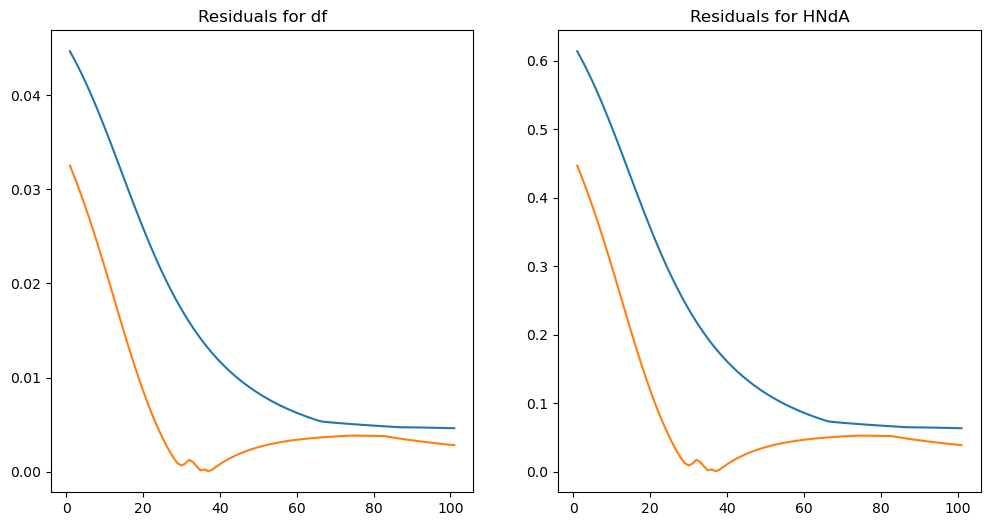

In [81]:
'''
Plot of the residual data
'''
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 6))


ax[0].plot(iteration_list, df_list_max)
ax[0].plot(iteration_list, df_list_min)

ax[1].plot(iteration_list, dHNdA_list_max)
ax[1].plot(iteration_list, dHNdA_list_min)



ax[0].set_title('Residuals for df')
ax[1].set_title('Residuals for HNdA')

[array([ 3.25218328e-03, -5.81934501e-17, -4.04121181e-19], dtype=float64), array([-3.25218328e-03,  3.87956334e-17,  4.04121181e-18], dtype=float64), array([-5.17275112e-17, -3.25218328e-03, -0.00000000e+00], dtype=float64), array([-3.23296945e-18,  3.25218328e-03, -0.00000000e+00], dtype=float64), array([-3.23296945e-18,  3.25218328e-03, -0.00000000e+00], dtype=float64), array([-5.17275112e-17, -3.25218328e-03, -0.00000000e+00], dtype=float64), array([-5.17275112e-17, -3.25218328e-03, -0.00000000e+00], dtype=float64), array([-3.25218328e-03,  3.71791486e-17, -0.00000000e+00], dtype=float64), array([ 3.25218328e-03, -5.81934501e-17, -0.00000000e+00], dtype=float64), array([-0.00229964, -0.00229964, -0.        ], dtype=float64), array([ 2.29964085e-03, -2.29964085e-03,  4.04121181e-19], dtype=float64), array([ 2.29964085e-03, -2.29964085e-03, -4.04121181e-19], dtype=float64), array([-0.00229964, -0.00229964, -0.        ], dtype=float64), array([ 3.25218328e-03, -5.81934501e-17, -0.0000

In [59]:
plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

In [20]:

i=0

for v in HC.V:
    i = i +1
    print(i)

dummy_array3 = np.zeros((3,i))



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136


In [25]:
j=0


for v in HC.V:
    #print(HNdA_i)
    dummy_array3[:,j] = HNdA_i
    j = j+1
'''
cHCV = copy.copy(HC.V)
for v in HC.V:
    print(HNdA_i)
    dummy_array3[:,j] = HNdA_i
    j = j+1
'''


'\ncHCV = copy.copy(HC.V)\nfor v in HC.V:\n    print(HNdA_i)\n    dummy_array3[:,j] = HNdA_i\n    j = j+1\n'

In [22]:
print(dummy_array3)

[[-0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221 -0.10071221
  -0.10071221 -0.10071221 -0.10071221 

In [23]:
# dummy_array
# dummy_array3[:,0] = HNdA_i
# dummy_array3

print(max(dummy_array3[0,:]))
print(max(dummy_array3[1,:]))
print(max(dummy_array3[2,:]))

print(min(dummy_array3[0,:]))
print(min(dummy_array3[1,:]))
print(min(dummy_array3[2,:]))

-0.10071220757895044
0.0417273428939009
0.008581346910338683
-0.10071220757895044
0.0417273428939009
0.008581346910338683


In [16]:
dummy_array3[:,:]

array([[-0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.10071221, -0.10071221,
        -0.10071221, -0.10071221, -0.10071221, -0.1

In [17]:
'''

HNdA_i

for v in HC.V:
    print(v.x[2])
'''

'\n\nHNdA_i\n\nfor v in HC.V:\n    print(v.x[2])\n'